# <center> Anticipez les besoins en consommation de bâtiments - Prédiction de SiteEnergyUse(kBtu)

# 1. Introduction

## 1.1 Les librairies python utilisées dans notre programme

In [3]:
!pip install xgboost

<IPython.core.display.Javascript object>

In [4]:
!pip install shap

<IPython.core.display.Javascript object>

In [5]:
!pip install category-encoders

<IPython.core.display.Javascript object>

In [6]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [7]:
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [8]:
from sklearn.metrics import *
from sklearn.metrics import r2_score

<IPython.core.display.Javascript object>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


# sklearn
# from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import RobustScaler

from category_encoders.target_encoder import TargetEncoder
from sklearn.compose import ColumnTransformer

import shap

shap.initjs()

# model de machine learning
from sklearn.linear_model import LinearRegression, BayesianRidge, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import (
    cross_val_score,
    cross_val_predict,
    validation_curve,
    GridSearchCV,
)
from sklearn.ensemble import GradientBoostingRegressor


import time


from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

# Création de pipelines

from sklearn.pipeline import Pipeline

# Transformateurs de variables
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

<IPython.core.display.Javascript object>

In [10]:
import matplotlib

print("matplotlib: {}".format(matplotlib.__version__))
print("numpy: {}".format(np.__version__))
print("pandas: {}".format(pd.__version__))
print("seaborn: {}".format(sns.__version__))

matplotlib: 3.7.1
numpy: 1.24.3
pandas: 1.5.3
seaborn: 0.12.2


<IPython.core.display.Javascript object>

## 1.2 Les fichiers des données contenus dans le dossier

In [11]:
# Affecter une variable avec le chemin vers le dossier
path = "C:/Users/maimo/Documents/projet 3/"
os.listdir(path)  # methode affichant tous les fichiers contenus dans notre dossier

['2016_Building_Energy_Benchmarking.csv',
 'Anticipez les besoins en consommation de bâtiments - OpenClassrooms.pdf',
 'archive.mp4',
 'Bacar_Maïmouna_4_ Anticipez les besoins en consommation de bâtiments_042023',
 'Benchmarking_clean.csv',
 'evaluation.pdf',
 'MB_P4_anticipez-les-besoins-en-consommation-de-batiments_2023-06-26T132721.zip']

<IPython.core.display.Javascript object>

In [12]:
path + "Benchmarking_clean.csv"  # le chemin du fichier  dans mon ordinateur

'C:/Users/maimo/Documents/projet 3/Benchmarking_clean.csv'

<IPython.core.display.Javascript object>

# 2. Rappel du data

## 2.1 Data

In [13]:
Benchmarking = pd.read_csv(path + "Benchmarking_clean.csv")

<IPython.core.display.Javascript object>

In [14]:
Benchmarking.head()

,BuildingType,SiteEUI(kBtu/sf),Neighborhood,ListOfAllPropertyUseTypes,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ThirdLargestPropertyUseType,GHGEmissionsIntensity,NumberofFloors,...,SourceEUI(kBtu/sf),SteamUse(kBtu),ComplianceStatus,Address,YearBuilt,PropertyGFAParking,ENERGYSTARScore,TotalGHGEmissions,DataYear,OSEBuildingID
0,NonResidential,81.699997,DOWNTOWN,Hotel,29703.5,10713.0,NaN,NaN,2.83,12.0,...,182.500000,2.003882e+06,Compliant,405 Olive way,1927.0,0.0,60.0,249.98,2016.0,1.0
1,NonResidential,94.800003,DOWNTOWN,"Hotel, Parking, Restaurant",15064.0,4622.0,NaN,Restaurant,2.86,11.0,...,176.100006,-5.820766e-11,Compliant,724 Pine street,1996.0,15064.0,61.0,295.86,2016.0,2.0
2,NonResidential,96.000000,DOWNTOWN,Hotel,153634.0,9013.0,NaN,NaN,2.19,41.0,...,241.899994,2.156655e+07,Compliant,1900 5th Avenue,1969.0,196718.0,43.0,2089.28,2016.0,3.0
3,NonResidential,110.800003,DOWNTOWN,Hotel,27752.5,4870.5,NaN,NaN,4.67,10.0,...,216.199997,2.214446e+06,Compliant,620 STEWART ST,1926.0,0.0,56.0,286.43,2016.0,5.0
4,NonResidential,114.800003,DOWNTOWN,"Hotel, Parking, Swimming Pool",68009.0,0.0,NaN,Swimming Pool,2.88,18.0,...,211.399994,-5.820766e-11,Compliant,401 LENORA ST,1980.0,62000.0,75.0,505.01,2016.0,8.0


<IPython.core.display.Javascript object>

In [15]:
print(f"shape : {Benchmarking.shape}")
print(f"le nombre de lignes est : {Benchmarking.shape[0]}")
print(f"le nombre de colonnes est : {Benchmarking.shape[1]}")

shape : (1668, 35)
le nombre de lignes est : 1668
le nombre de colonnes est : 35


<IPython.core.display.Javascript object>

In [16]:
Benchmarking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1668 entries, 0 to 1667
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     1668 non-null   object 
 1   SiteEUI(kBtu/sf)                 1668 non-null   float64
 2   Neighborhood                     1668 non-null   object 
 3   ListOfAllPropertyUseTypes        1666 non-null   object 
 4   SecondLargestPropertyUseTypeGFA  1668 non-null   float64
 5   ThirdLargestPropertyUseTypeGFA   1668 non-null   float64
 6   YearsENERGYSTARCertified         98 non-null     object 
 7   ThirdLargestPropertyUseType      353 non-null    object 
 8   GHGEmissionsIntensity            1668 non-null   float64
 9   NumberofFloors                   1668 non-null   float64
 10  Latitude                         1668 non-null   float64
 11  PropertyGFABuilding(s)           1668 non-null   float64
 12  NaturalGas(kBtu)    

<IPython.core.display.Javascript object>

## 2.2 Colonnes numériques

In [17]:
cols_num_tot = Benchmarking.select_dtypes(
    include=np.number
).columns  # les colonnes numériques
cols_num_tot

Index(['SiteEUI(kBtu/sf)', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'GHGEmissionsIntensity',
       'NumberofFloors', 'Latitude', 'PropertyGFABuilding(s)',
       'NaturalGas(kBtu)', 'NumberofBuildings', 'Electricity(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'LargestPropertyUseTypeGFA', 'Longitude',
       'SiteEnergyUse(kBtu)', 'CouncilDistrictCode', 'SourceEUI(kBtu/sf)',
       'SteamUse(kBtu)', 'YearBuilt', 'PropertyGFAParking', 'ENERGYSTARScore',
       'TotalGHGEmissions', 'DataYear', 'OSEBuildingID'],
      dtype='object')

<IPython.core.display.Javascript object>

Nous avons ainsi toutes les colonnes numérique affichées ci-dessus.

In [18]:
print(f"il y a {len(cols_num_tot)} colonnes numériques")

il y a 23 colonnes numériques


<IPython.core.display.Javascript object>

## 2.3  Benchmarking[ 'SiteEnergyUse(kBtu)' ]

In [19]:
Benchmarking["SiteEnergyUse(kBtu)"].describe()

count    1.668000e+03
mean     8.431824e+06
std      3.022623e+07
min      0.000000e+00
25%      1.231646e+06
50%      2.554947e+06
75%      6.905486e+06
max      8.739237e+08
Name: SiteEnergyUse(kBtu), dtype: float64

<IPython.core.display.Javascript object>

<Figure size 1200x800 with 0 Axes>

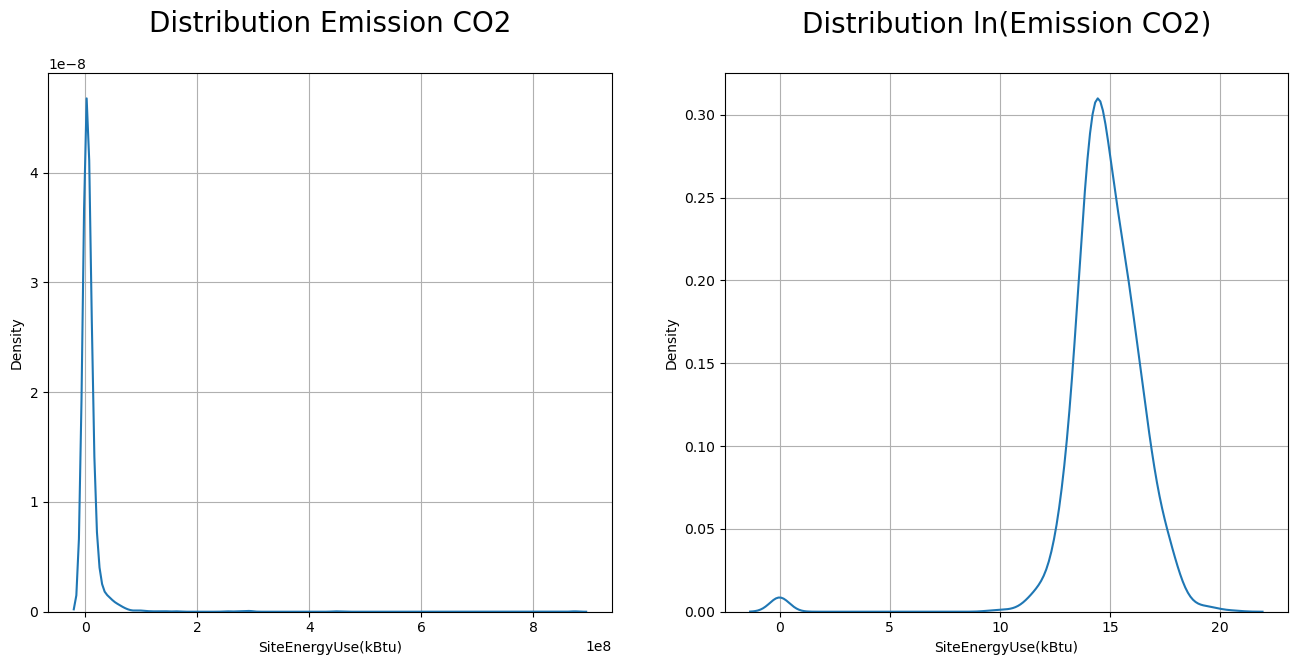

<IPython.core.display.Javascript object>

In [20]:
plt.figure(figsize=(12, 8))
fig, axs = plt.subplots(1, 2, figsize=(16, 7))
sns.kdeplot(Benchmarking["SiteEnergyUse(kBtu)"], ax=axs[0])
sns.kdeplot(np.log1p(Benchmarking["SiteEnergyUse(kBtu)"]), ax=axs[1])


axs[0].grid()
axs[1].grid()

axs[0].set_title("Distribution Emission CO2\n", fontsize=20)
axs[1].set_title("Distribution ln(Emission CO2)\n", fontsize=20)
plt.show()

# 3. Prédiction 

## 3.1 Préequis

Il existe différents types de métriques afin d'évaluer un modéle.  Dans notre cas nous utiliserons 3 métriques $R^{2}$, *RSME* et *MAE*. Afin d'utiliser ces métrique nous devrons importer la librairie **sklearn.metrics**

## 3.2 Le coefficient de détermination appelé $R^{2}$

La première valeur permettant d'évaluer le modèle est le coefficient de détermination appelé $R^{2}$ . En outre un modèle ayant un coefficient de détermination inférieur à 20% est dit non performant. À l'inverse un modèle ayant un coefficient de détermination supérieur à 80% est dit très performant. Sa formule est la suivante avec n le nombre de valeurs, $Y_{test}$ la valeur issus de notre jeu de donnée,  $Y_{pred}$ la valeur calculé par le modèle, $Y_{moy}$ la valeur moyenne des mesures


$$R^{2} = 1-\frac{\sum_{i=1}^n (Y_{test}-Y_{pred})^{2}}{\sum_{i=1}^n (Y_{test}-Y_{moy})^{2}}$$

Ainsi le $R^{2}$ permet de comparer la performance du modèle avec une performance basique. Néanmoins, $R^{2}$ ne décrit pas quelle erreur est faite en moyenne sur les prédictions. Par conséquent afin de détourner ce problème il est nécessaire de le compléter avec d'autres métriques tels que la RMSE ou la MAE.

## 3.3  La racine de la moyenne de l'erreur quadratique  𝑅𝑀𝑆𝐸

La seconde métrique permettant d'évaluer le modèle est la racine de la moyenne de l'erreur quadratique $RMSE$ ( Root Mean Squared Error). Cette métique s'exprime dans la même unité que la variable à prédire. RMSE permet de quantifier les erreurs réalisées par le modèle. En outre, plus les erreurs sont élevées, moins le modèle est performant. Sa formule est la suivante :

$$RMSE =\sqrt{\sum_{i=1}^n \frac{1}{n}  (Y_{test}-Y_{pred})^{2}}$$


$RMSE$ possède de multiples avantages. Tout d'abord, elle pénalise plus séverement les grandes erreurs que les petites erreurs. En outre $RMSE$ utilise le carré dans la somme de surcroît une erreur 3 fois plus grande aura 9 fois plus d’impact sur la moyenne. Par conséquent, elle est très sensibles aux outliers.

## 3.4 L'erreur absolue moyenne 𝑀𝐴𝐸

La dernière métrique que nous utiliserons est  l'erreur absolue moyenne dite $MAE$ (Mean Absolute Error). MAE est la métrique de régression la plus interprétable, ce qui en fait une métrique populaire malgré son manque de régularité.
La MAE est dans la même unité que la variable à prédire. Par conséquent, elle est facile à interpréter.

$$MAE = \frac{1}{n}\sum_{i=1}^n  |Y_{test}-Y_{pred}|$$

Les avantages de la $MAE$ sont nombreuses. Tout d'abord elle pénalise autant les grandes erreurs que les petites erreurs. En outre l’utilisation d'une valeur absolue dans la somme, une erreur 2 fois plus grande aura 2 fois plus d’impact sur l’erreur. De plus elle est aussi  sensible aux outliers. De plus $MAE$ est dans la même unité que la variable à prédire ainsi plus facile à interpréter.

# 4. Taget :  'SiteEnergyUse(kBtu)'

Dans ce notebook la valeur à prédire, nommée target, est 'TotalGHGEmissions'.

In [21]:
Y = Benchmarking["SiteEnergyUse(kBtu)"]  # target
Y

0       7.226362e+06
1       8.387933e+06
2       7.258702e+07
3       6.794584e+06
4       1.417261e+07
            ...     
1663    8.497457e+05
1664    9.502762e+05
1665    5.765898e+06
1666    7.194712e+05
1667    1.152896e+06
Name: SiteEnergyUse(kBtu), Length: 1668, dtype: float64

<IPython.core.display.Javascript object>

 # 5. Features

Feactures correspondent aux variables permettant de prédire le target.

Il est nécessaire de selectionner les colonnes pour faire notre prédiction. En effet utiliser toutes les colonnes numériques pourrait fausse notre prédiction.

* 'SourceEUI(kBtu/sf)' : la quantité totale de combustible brut nécessaire au fonctionnement du bâtiment
* 'YearBuilt' : l'année de construction 

* 'PropertyGFABuilding(s)' : la surface du bâtiment
* 'PropertyGFAParking' : la surface du parking

* 'BuildingType' : le type de bâtiment
* 'Neighborhood' : les voisins
* 'ListOfAllPropertyUseTypes' : les utilisations de la structure
* 'LargestPropertyUseType': type d'utilisation la plus importante de la propriété
* 'NumberofFloors' : le nombre d'étage


Dans notre analyse nous allons aussi déterminer si ENERGYSTARScore a de influence sur notre target. Ainsi nous réaliserons une prédiction sans ENERGYSTARScore et une autre avec ENERGYSTARScore.

 ## 5.1 La selection des features sans ENERGYSTARScore

Tout d'abord nous allons créer une liste des features sans ENERGYSTARScore

In [22]:
# liste des features sans ENERGYSTARScore
colonne_feature = [
    "SourceEUI(kBtu/sf)",
    "YearBuilt",
    "PropertyGFABuilding(s)",
    "PropertyGFAParking",
    "BuildingType",
    "ListOfAllPropertyUseTypes",
    "PrimaryPropertyType",
    "NumberofFloors",
    "Neighborhood",
]
colonne_feature

['SourceEUI(kBtu/sf)',
 'YearBuilt',
 'PropertyGFABuilding(s)',
 'PropertyGFAParking',
 'BuildingType',
 'ListOfAllPropertyUseTypes',
 'PrimaryPropertyType',
 'NumberofFloors',
 'Neighborhood']

<IPython.core.display.Javascript object>

Ensuite nous réaliserons un dataframe X avec les colonnes de notre liste 'colonne_feature' à partir du dataframe Benchmarking

In [23]:
# les features sans ENERGYSTARScore
X = Benchmarking[colonne_feature]
X.head()

,SourceEUI(kBtu/sf),YearBuilt,PropertyGFABuilding(s),PropertyGFAParking,BuildingType,ListOfAllPropertyUseTypes,PrimaryPropertyType,NumberofFloors,Neighborhood
0,182.500000,1927.0,88434.0,0.0,NonResidential,Hotel,Hotel,12.0,DOWNTOWN
1,176.100006,1996.0,88502.0,15064.0,NonResidential,"Hotel, Parking, Restaurant",Hotel,11.0,DOWNTOWN
2,241.899994,1969.0,759392.0,196718.0,NonResidential,Hotel,Hotel,41.0,DOWNTOWN
3,216.199997,1926.0,61320.0,0.0,NonResidential,Hotel,Hotel,10.0,DOWNTOWN
4,211.399994,1980.0,113580.0,62000.0,NonResidential,"Hotel, Parking, Swimming Pool",Hotel,18.0,DOWNTOWN


<IPython.core.display.Javascript object>

Nous remarquons que notre dataframe possède des variables numériques et des variables catégoriques. Ainsi il est nécessaire de les séparer. Par conséquent nous ferons une liste avec les colonnes numériques et une liste avec les colonnes catégoriques. 

In [24]:
# colonnes numériques sans ENERGYSTARScore
cols_num = [
    "SourceEUI(kBtu/sf)",
    "YearBuilt",
    "PropertyGFABuilding(s)",
    "PropertyGFAParking",
    "NumberofFloors",
]
cols_num

['SourceEUI(kBtu/sf)',
 'YearBuilt',
 'PropertyGFABuilding(s)',
 'PropertyGFAParking',
 'NumberofFloors']

<IPython.core.display.Javascript object>

In [25]:
# colonnes catégoriques
cols_categ = [
    "BuildingType",
    "ListOfAllPropertyUseTypes",
    "PrimaryPropertyType",
    "Neighborhood",
]
cols_categ

['BuildingType',
 'ListOfAllPropertyUseTypes',
 'PrimaryPropertyType',
 'Neighborhood']

<IPython.core.display.Javascript object>

Enfin nous créeons une pipeline afin de facilité les changements qu'on effectura sur les features.

In [26]:
# Sans 'ENERGYSTARScore'
preprocessor = make_column_transformer(
    (StandardScaler(), cols_num), (OneHotEncoder(handle_unknown="ignore"), cols_categ)
)

<IPython.core.display.Javascript object>

## 5.2 La selection des features avec ENERGYSTARScore

Nous allons réaliser les mêmes étapes que pour la selection des features sans 'ENERGYSTARScore'. La seule différence sera l'ajout de la colonne ENERGYSTARScore dans la liste des colonnes features. Il est impératif que toutes les colonnes choisis soitent complète. Dans notre cas toutes les colonnes numériques sont complète, ce qui n'est pas forcement le cas pour les colonnes catégoriques.

In [27]:
Benchmarking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1668 entries, 0 to 1667
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     1668 non-null   object 
 1   SiteEUI(kBtu/sf)                 1668 non-null   float64
 2   Neighborhood                     1668 non-null   object 
 3   ListOfAllPropertyUseTypes        1666 non-null   object 
 4   SecondLargestPropertyUseTypeGFA  1668 non-null   float64
 5   ThirdLargestPropertyUseTypeGFA   1668 non-null   float64
 6   YearsENERGYSTARCertified         98 non-null     object 
 7   ThirdLargestPropertyUseType      353 non-null    object 
 8   GHGEmissionsIntensity            1668 non-null   float64
 9   NumberofFloors                   1668 non-null   float64
 10  Latitude                         1668 non-null   float64
 11  PropertyGFABuilding(s)           1668 non-null   float64
 12  NaturalGas(kBtu)    

<IPython.core.display.Javascript object>

En premier lieu nous réaliserons la liste des features sans ENERGYSTARScore.

In [28]:
# liste des features avec ENERGYSTARScore
colonne_feature2 = [
    "SourceEUI(kBtu/sf)",
    "YearBuilt",
    "PropertyGFABuilding(s)",
    "PropertyGFAParking",
    "BuildingType",
    "ListOfAllPropertyUseTypes",
    "PrimaryPropertyType",
    "NumberofFloors",
    "Neighborhood",
    "ENERGYSTARScore",
]
colonne_feature2

['SourceEUI(kBtu/sf)',
 'YearBuilt',
 'PropertyGFABuilding(s)',
 'PropertyGFAParking',
 'BuildingType',
 'ListOfAllPropertyUseTypes',
 'PrimaryPropertyType',
 'NumberofFloors',
 'Neighborhood',
 'ENERGYSTARScore']

<IPython.core.display.Javascript object>

Ensuite la création des features avec ENERGYSTARScore.

In [29]:
# features avec ENERGYSTARScore
X2 = Benchmarking[colonne_feature2]
X2.head()

,SourceEUI(kBtu/sf),YearBuilt,PropertyGFABuilding(s),PropertyGFAParking,BuildingType,ListOfAllPropertyUseTypes,PrimaryPropertyType,NumberofFloors,Neighborhood,ENERGYSTARScore
0,182.500000,1927.0,88434.0,0.0,NonResidential,Hotel,Hotel,12.0,DOWNTOWN,60.0
1,176.100006,1996.0,88502.0,15064.0,NonResidential,"Hotel, Parking, Restaurant",Hotel,11.0,DOWNTOWN,61.0
2,241.899994,1969.0,759392.0,196718.0,NonResidential,Hotel,Hotel,41.0,DOWNTOWN,43.0
3,216.199997,1926.0,61320.0,0.0,NonResidential,Hotel,Hotel,10.0,DOWNTOWN,56.0
4,211.399994,1980.0,113580.0,62000.0,NonResidential,"Hotel, Parking, Swimming Pool",Hotel,18.0,DOWNTOWN,75.0


<IPython.core.display.Javascript object>

Puis la séparation des colonnes numériques et catégoriques

In [30]:
# colonnes numérique avec ENERGYSTARScore
cols_num2 = [
    "SourceEUI(kBtu/sf)",
    "YearBuilt",
    "PropertyGFABuilding(s)",
    "PropertyGFAParking",
    "NumberofFloors",
    "ENERGYSTARScore",
]
cols_num2

['SourceEUI(kBtu/sf)',
 'YearBuilt',
 'PropertyGFABuilding(s)',
 'PropertyGFAParking',
 'NumberofFloors',
 'ENERGYSTARScore']

<IPython.core.display.Javascript object>

Les colonnes catégoriques sont les mêmes que celle dans la partie ENERGYSTARScore donc nous allons reprendre la variable *cols_categ*

Enfin nous terminerons avec la création du pipeline.

In [31]:
# Avec 'ENERGYSTARScore'
preprocessor2 = make_column_transformer(
    (StandardScaler(), cols_num2), (OneHotEncoder(handle_unknown="ignore"), cols_categ)
)

<IPython.core.display.Javascript object>

# 6. Différentes variables X_train, X_test, Y_train, Y_test

## 6.1 Définir les variables

il est nécessaire d'utiliser des differentes variable pour une prédiction. Afin de facilité la lecture de la pédiction on explicitera les termes. 



X_train : correspond à Features engineering d'entrainement 

X_test : correspond à Features engineering du test 

Y_train : correspond à taget d'entrainement  


Y_test :correspond à Features engineering d'entrainementaget du test 

## 6.2 Sélectionner les variables apprentissage et test

Nous devons séparer les variables d'apprentissage de celles du test

In [32]:
# Sans ENERGYSTARScore


X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

print(
    "Entrainement: {} lignes,\nTest: {} lignes.\n".format(
        X_train.shape[0], X_test.shape[0]
    )
)

Entrainement: 1334 lignes,
Test: 334 lignes.



<IPython.core.display.Javascript object>

In [33]:
# Avec ENERGYSTARScore


X2_train, X2_test, Y2_train, Y2_test = train_test_split(
    X2, Y, test_size=0.2, random_state=42
)

print(
    "Entrainement: {} lignes,\nTest: {} lignes.\n".format(
        X2_train.shape[0], X2_test.shape[0]
    )
)

Entrainement: 1334 lignes,
Test: 334 lignes.



<IPython.core.display.Javascript object>

# 7. Modèles potentiels pour Machine learning

Il existe de nombreux modèles, dans notre problème nous utiliserons les suivants; LinearRegression, ElasticNet, RandomForestRegressor, ExtraTreesRegressor et XGBRegressor

## 7.1 Sans 'ENERGYSTARScore'

Tout d'abord nous allons créer un dictionnaire contenant tous les modèles.  

In [34]:
# création d'un dictionnaire de modèle
algos = {
    "LinearRegression": LinearRegression(),
    "ElasticNet": ElasticNet(),
    "RandomForestRegressor": RandomForestRegressor(),
    "ExtraTreesRegressor": ExtraTreesRegressor(),
    "XGBRegressor": XGBRegressor(),
}

<IPython.core.display.Javascript object>

Ensuite nous créerons une liste *results* où nous mettrons nos résultats c'est à dire le nom du modèle, la MAE, la RMSE, le R2 et le temps d'exécution du modèle.

In [35]:
results = []  # création d'une liste

<IPython.core.display.Javascript object>

Maintenant nous pouvons réaliser notre prédiction.

In [36]:
y = ["SiteEnergyUse(kBtu)"]  # la valeur à prédire, target

for nom_algo, algo in algos.items():  # parcourir dictionnaire
    print(f"Algorithme: {nom_algo}")  # nom du modèle
    for i in y:
        start = time.time()
        model = make_pipeline(preprocessor, algo)  # le modèle
        model.fit(X_train, Y_train)  # entrainement
        y_pred = model.predict(X_test)  # prediction

        MAE = round(mean_absolute_error(Y_test, y_pred), 5)  # moyen absolue
        RMSE = round(
            np.sqrt(mean_squared_error(Y_test, y_pred)), 5
        )  # racine moyenne quadratique
        R2 = round(r2_score(Y_test, y_pred), 5)  # coeff de détermination

        end = time.time()
        temps = round(end - start, 3)  # temps entrainement
        print(
            f" MAE :{MAE} \n RMSE :{RMSE} \n R2 :{R2}\n temps entrainement :{temps}s\n"
        )

        print("-" * 100)  # la séparation

        results.append([nom_algo, MAE, RMSE, R2, temps])

Algorithme: LinearRegression
 MAE :5600049.98812 
 RMSE :16353273.51968 
 R2 :0.63839
 temps entrainement :0.07s

----------------------------------------------------------------------------------------------------
Algorithme: ElasticNet
 MAE :4689606.88084 
 RMSE :20641219.83824 
 R2 :0.4239
 temps entrainement :0.043s

----------------------------------------------------------------------------------------------------
Algorithme: RandomForestRegressor
 MAE :2861751.42208 
 RMSE :13645119.4864 
 R2 :0.74824
 temps entrainement :6.49s

----------------------------------------------------------------------------------------------------
Algorithme: ExtraTreesRegressor
 MAE :2942840.76269 
 RMSE :14782249.1304 
 R2 :0.70453
 temps entrainement :8.064s

----------------------------------------------------------------------------------------------------
Algorithme: XGBRegressor
 MAE :2865376.88174 
 RMSE :13816504.20252 
 R2 :0.74188
 temps entrainement :0.164s

----------------------------

<IPython.core.display.Javascript object>

Il serait préférable de mettre tous nos résultats sous forme de dataframe.

In [37]:
# liste des noms des colonnes du futur dataFrame
colonnes_resultats = ["algorithme", "MAE", "RMSE", "R2", "temps (s)"]

<IPython.core.display.Javascript object>

In [38]:
# DataFrame regroupent les resultats des modèles
df_results = pd.DataFrame(results, columns=colonnes_resultats)
display(df_results.sort_values(by=["R2"], ascending=False))

,algorithme,MAE,RMSE,R2,temps (s)
2,RandomForestRegressor,2.861751e+06,1.364512e+07,0.74824,6.490
4,XGBRegressor,2.865377e+06,1.381650e+07,0.74188,0.164
3,ExtraTreesRegressor,2.942841e+06,1.478225e+07,0.70453,8.064
0,LinearRegression,5.600050e+06,1.635327e+07,0.63839,0.070
1,ElasticNet,4.689607e+06,2.064122e+07,0.42390,0.043


<IPython.core.display.Javascript object>

Nous allons tracer les graphes pour chaque métriques.

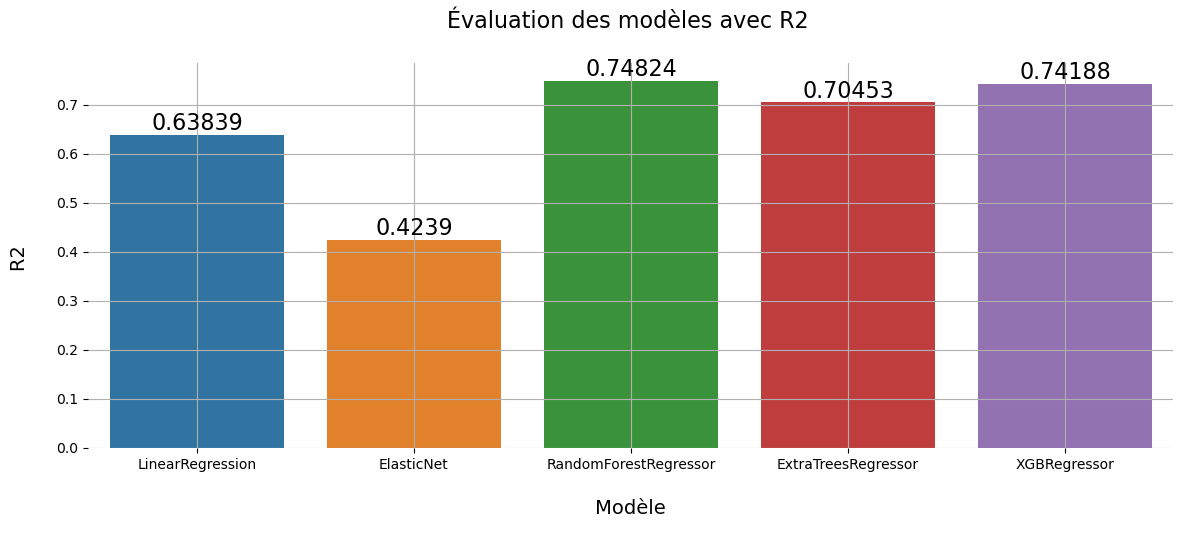

<IPython.core.display.Javascript object>

In [39]:
# Metrique R2
plt.figure(figsize=(14, 5))

splot = sns.barplot(x="algorithme", y="R2", data=df_results)

plt.ylabel("R2 \n", size=14)
plt.xlabel("\n Modèle \n", size=14)
plt.title("Évaluation des modèles avec R2 \n", size=16)


# supprimer les bordures du graphe (côté esthétique)
for s in ["top", "bottom", "left", "right"]:
    splot.spines[s].set_visible(False)

splot.bar_label(splot.containers[0], fontsize=16)  # la valeur de l'ordonnée sur la bar

plt.grid()
plt.show()

D'après le coefficient de détermination les modèles ExtraTreesRegressor et XGBRegressor semblent les plus performant, tandis que ElasticNet semble être un modèle peu performant. Cependant nous pouvons pas conclure la performance d'un modèle en se basant uniquement sur cette métrique. Ainsi nous allons regarder les 2 autres métriques afin de conclure sur la performance de nos modèles.

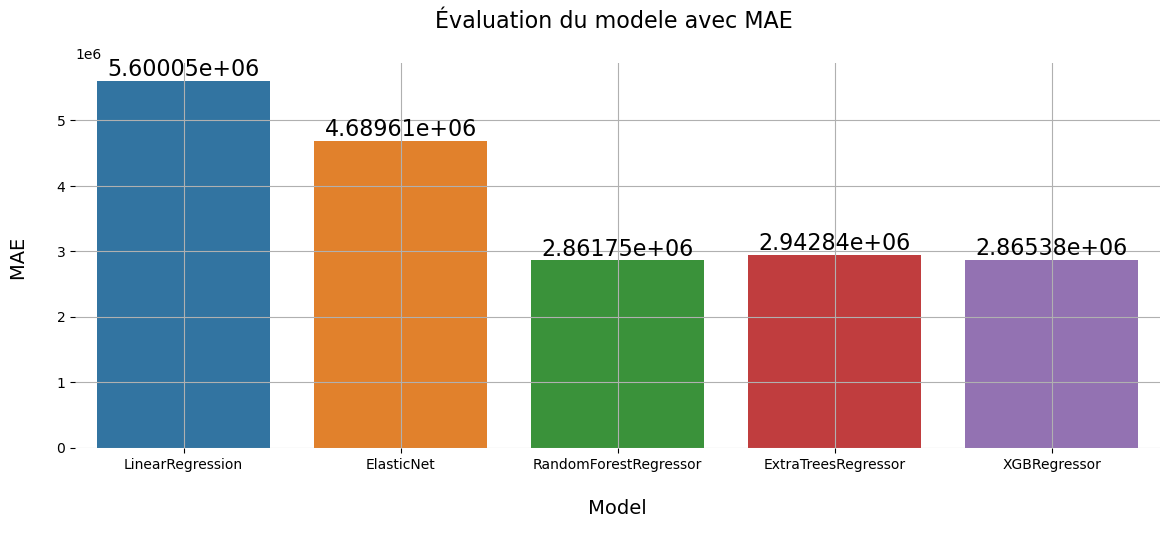

<IPython.core.display.Javascript object>

In [40]:
# Metrique MAE
plt.figure(figsize=(14, 5))
splot = sns.barplot(x="algorithme", y="MAE", data=df_results)

plt.ylabel("MAE \n", size=14)
plt.xlabel("\n Model \n", size=14)
plt.title("Évaluation du modele avec MAE \n", size=16)


# supprimer les bordures du graphe (côté esthétique)
for s in ["top", "bottom", "left", "right"]:
    splot.spines[s].set_visible(False)

splot.bar_label(splot.containers[0], fontsize=16)  # la valeur de l'ordonnée sur la bar

plt.grid()
plt.show()

Les modèles ayant la MAE les plus faible sont RandomForestRegressor, ExtraTreesRegressor et XGBRegressor, ces valeurs sont cohérente avec R². Nous pouvons constater que LinearRegressio , ayant un R² 2 fois plus grand que ElasticNet, possède une MAE similaire à ElasticNet. 

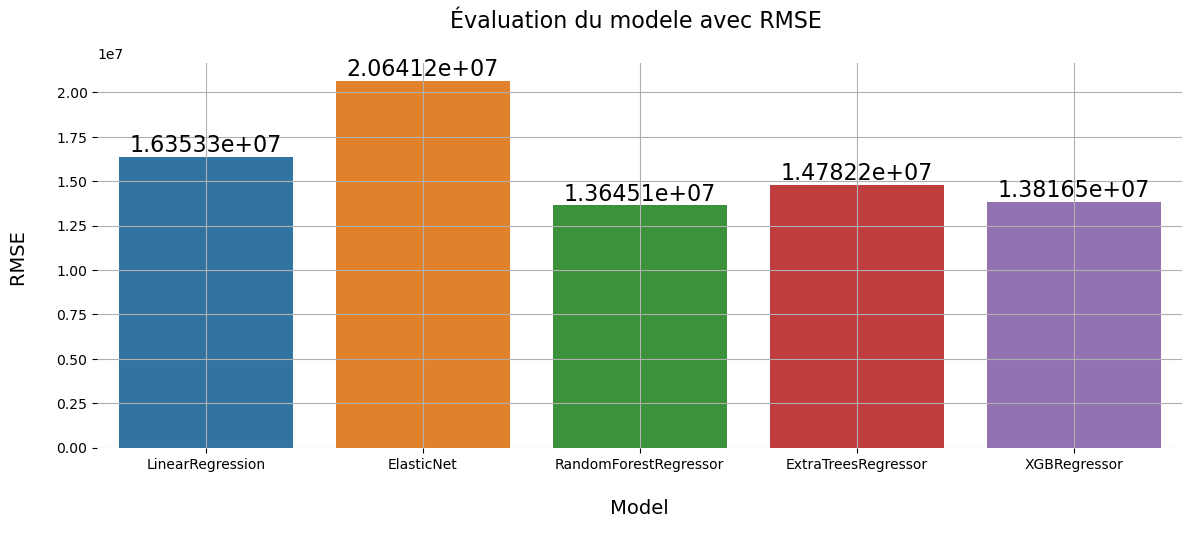

<IPython.core.display.Javascript object>

In [41]:
# Metrique RSME
plt.figure(figsize=(14, 5))
splot = sns.barplot(x="algorithme", y="RMSE", data=df_results)

plt.ylabel("RMSE \n", size=14)
plt.xlabel("\n Model \n", size=14)
plt.title("Évaluation du modele avec RMSE \n", size=16)


# supprimer les bordures du graphe (côté esthétique)
for s in ["top", "bottom", "left", "right"]:
    splot.spines[s].set_visible(False)

splot.bar_label(splot.containers[0], fontsize=16)  # la valeur de l'ordonnée sur la bar

plt.grid()
plt.show()

Après l'analyse des 3 métriques nous pouvons éloigner le modèle Elastic et LinearRegression qui sont les moins performant. 

## 7.2 Avec 'ENERGYSTARScore'

L'objectif de cette partie est de déterminer si ENERGYSTARScore a une réelle influence sur notre prédiction. Ainsi nous allons prédire notre target avec la même méthode que précédement et comparer graphiquement les résultats des métriques avec celle de la précédente prédiction ( celle sans 'ENERGYSTARScore').

### 7.2.1 Prédiction Avec 'ENERGYSTARScore'

In [42]:
results2 = []
y = ["SiteEnergyUse(kBtu)"]  # la valeur à prédire, target

for nom_algo, algo in algos.items():  # parcourir dictionnaire
    print(f"Algorithme: {nom_algo}")  # nom modèle
    for i in y:
        start = time.time()
        model = make_pipeline(preprocessor, algo)  # le modèle
        model.fit(X2_train, Y2_train)  # entrainement
        y2_pred = model.predict(X2_test)  # prediction

        MAE = round(mean_absolute_error(Y2_test, y2_pred), 5)  # erreur moyenne absolue
        RMSE = round(
            np.sqrt(mean_squared_error(Y2_test, y2_pred)), 5
        )  # erreur racine moyenne quadratique
        R2 = round(r2_score(Y2_test, y2_pred), 5)  # coeff de détermination

        end = time.time()
        temps = round(end - start, 3)  # temps entrainement
        print(
            f" MAE :{MAE} \n RMSE :{RMSE} \n R2 :{R2}\n temps entrainement :{temps}s\n"
        )

        print("-" * 100)  # la séparation

        results2.append([nom_algo, MAE, RMSE, R2, temps])

Algorithme: LinearRegression
 MAE :5600049.98812 
 RMSE :16353273.51968 
 R2 :0.63839
 temps entrainement :0.057s

----------------------------------------------------------------------------------------------------
Algorithme: ElasticNet
 MAE :4689606.88084 
 RMSE :20641219.83824 
 R2 :0.4239
 temps entrainement :0.07s

----------------------------------------------------------------------------------------------------
Algorithme: RandomForestRegressor
 MAE :2838629.96221 
 RMSE :13927281.63824 
 R2 :0.73772
 temps entrainement :6.552s

----------------------------------------------------------------------------------------------------
Algorithme: ExtraTreesRegressor
 MAE :2845043.40276 
 RMSE :14408030.07629 
 R2 :0.7193
 temps entrainement :8.498s

----------------------------------------------------------------------------------------------------
Algorithme: XGBRegressor
 MAE :2865376.88174 
 RMSE :13816504.20252 
 R2 :0.74188
 temps entrainement :0.37s

---------------------------

<IPython.core.display.Javascript object>

In [43]:
# liste des nom des colonnes du futur dataFrame
colonnes_resultats2 = ["algorithme", "MAE", "RMSE", "R2", "temps"]
# DataFrame regroupent les resultats des modèle
df_results2 = pd.DataFrame(results2, columns=colonnes_resultats2)
display(df_results2.sort_values(by=["R2"], ascending=False))

,algorithme,MAE,RMSE,R2,temps
4,XGBRegressor,2.865377e+06,1.381650e+07,0.74188,0.370
2,RandomForestRegressor,2.838630e+06,1.392728e+07,0.73772,6.552
3,ExtraTreesRegressor,2.845043e+06,1.440803e+07,0.71930,8.498
0,LinearRegression,5.600050e+06,1.635327e+07,0.63839,0.057
1,ElasticNet,4.689607e+06,2.064122e+07,0.42390,0.070


<IPython.core.display.Javascript object>

### 7.2.2 Comparaison  des métriques avec et sans EnergyStar

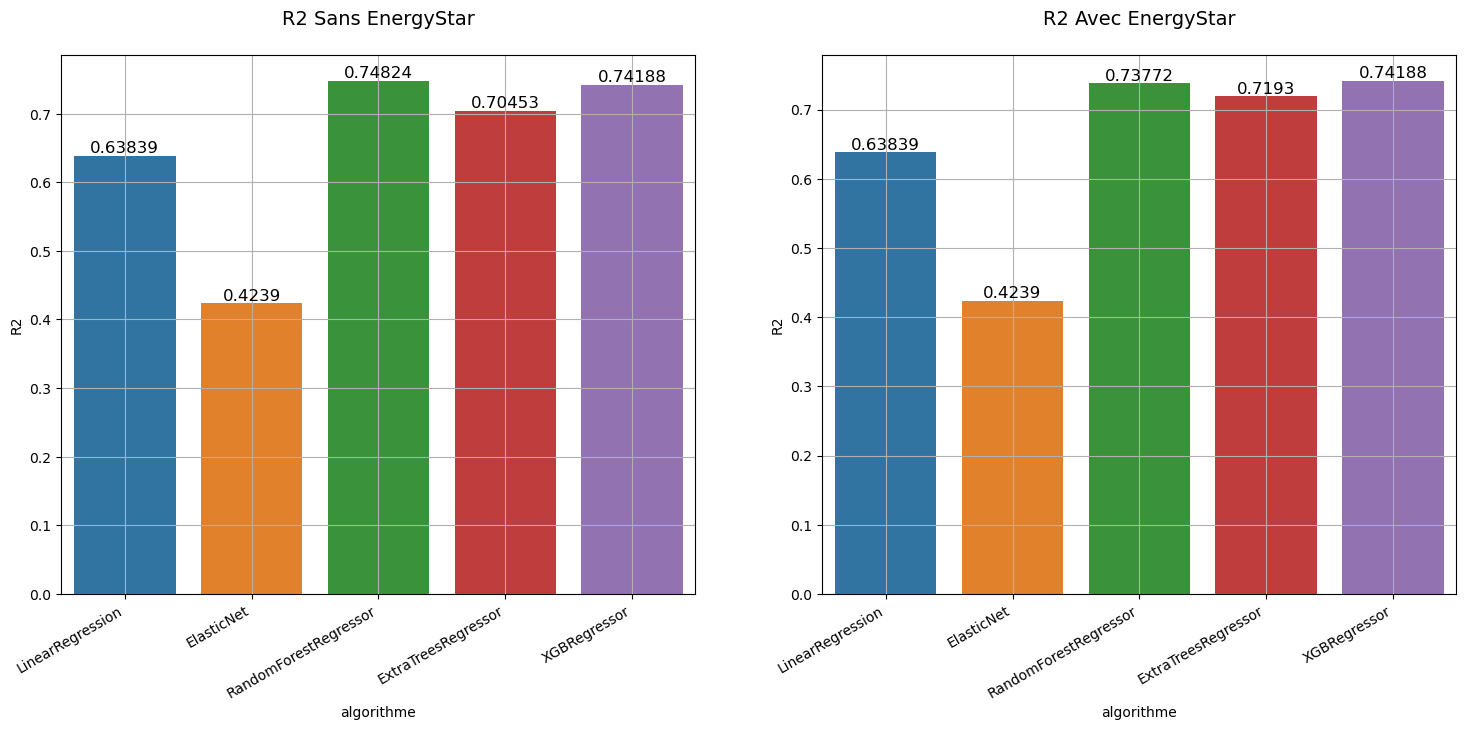

<IPython.core.display.Javascript object>

In [44]:
# R²

fig, axs = plt.subplots(1, 2, figsize=(18, 7))

# sans 'ENERGYSTARScore'
SansEN = sns.barplot(x="algorithme", y="R2", data=df_results, ax=axs[0])
SansEN.bar_label(SansEN.containers[0], fontsize=12)

# Avec 'ENERGYSTARScore'
AvecEN = sns.barplot(x="algorithme", y="R2", data=df_results2, ax=axs[1])
AvecEN.bar_label(AvecEN.containers[0], fontsize=12)


ax1 = axs[0]
ax2 = axs[1]

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha="right")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30, ha="right")


axs[0].grid()
axs[1].grid()

axs[0].set_title("R2 Sans EnergyStar\n", fontsize=14)
axs[1].set_title("R2 Avec EnergyStar\n", fontsize=14)

plt.show()

Les coefficients de détermination varient peu entre les 2 prédictions.

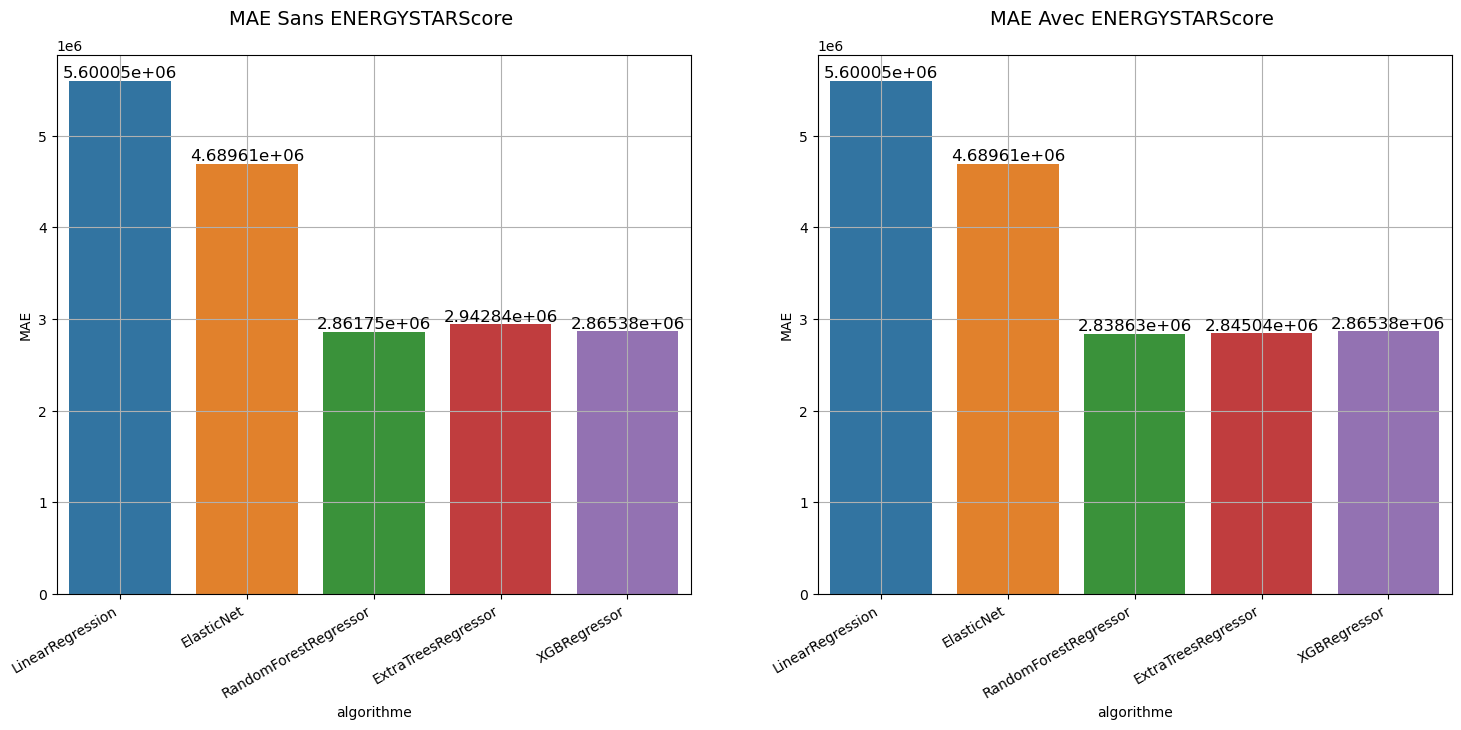

<IPython.core.display.Javascript object>

In [45]:
# MAE

fig, axs = plt.subplots(1, 2, figsize=(18, 7))

# Sans 'ENERGYSTARScore'
SansEN = sns.barplot(x="algorithme", y="MAE", data=df_results, ax=axs[0])
SansEN.bar_label(SansEN.containers[0], fontsize=12)

# Avec 'ENERGYSTARScore'
AvecEN = sns.barplot(x="algorithme", y="MAE", data=df_results2, ax=axs[1])
AvecEN.bar_label(AvecEN.containers[0], fontsize=12)

ax1 = axs[0]
ax2 = axs[1]

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha="right")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30, ha="right")

axs[0].grid()
axs[1].grid()

axs[0].set_title("MAE Sans ENERGYSTARScore \n", fontsize=14)
axs[1].set_title("MAE Avec ENERGYSTARScore \n", fontsize=14)

plt.show()

Les MAE varient peu entre les 2 prédictions

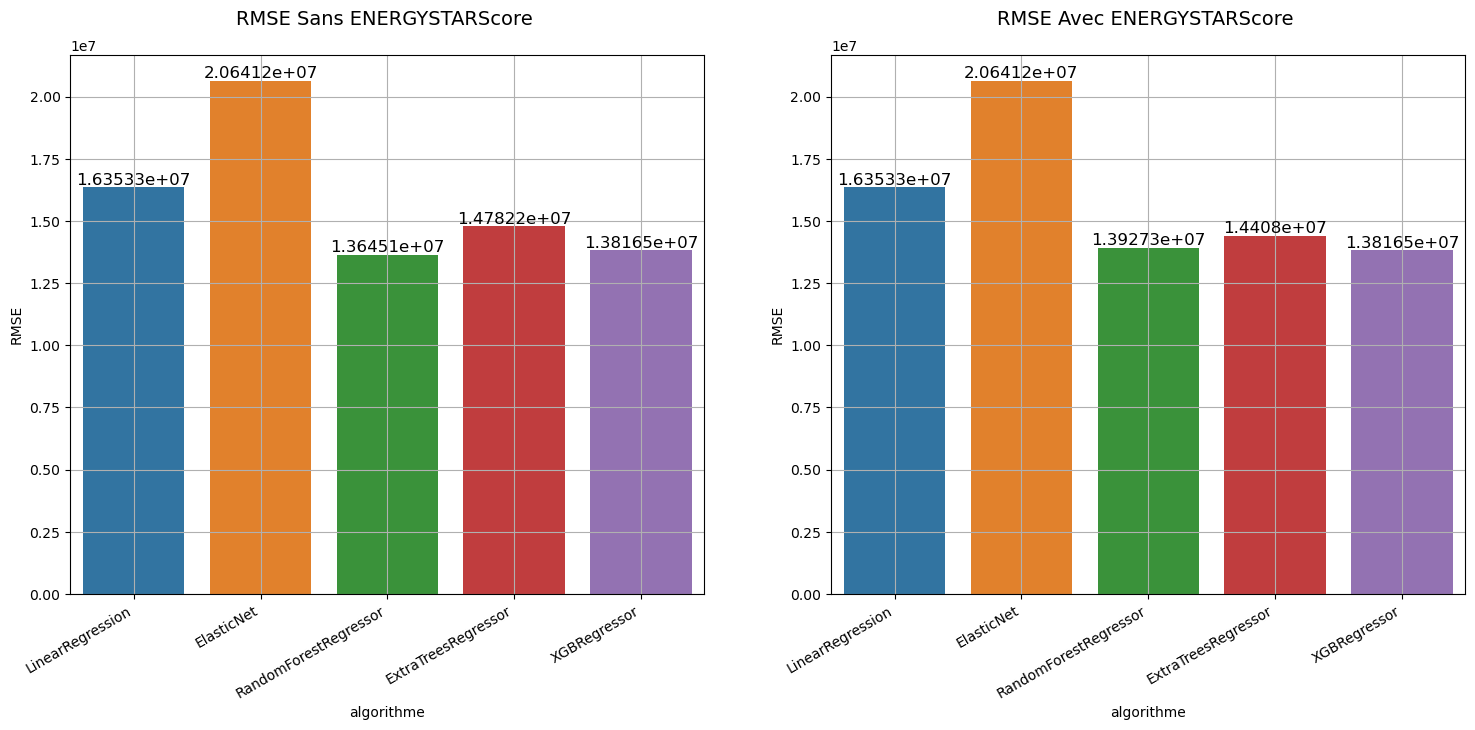

<IPython.core.display.Javascript object>

In [46]:
# RMSE

fig, axs = plt.subplots(1, 2, figsize=(18, 7))

# Sans 'ENERGYSTARScore'
SansEN = sns.barplot(x="algorithme", y="RMSE", data=df_results, ax=axs[0])
SansEN.bar_label(SansEN.containers[0], fontsize=12)

# Avec 'ENERGYSTARScore'
AvecEN = sns.barplot(x="algorithme", y="RMSE", data=df_results2, ax=axs[1])
AvecEN.bar_label(AvecEN.containers[0], fontsize=12)

ax1 = axs[0]
ax2 = axs[1]

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha="right")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30, ha="right")

axs[0].grid()
axs[1].grid()

axs[0].set_title("RMSE Sans ENERGYSTARScore \n", fontsize=14)
axs[1].set_title("RMSE Avec ENERGYSTARScore \n", fontsize=14)

plt.show()

RMSE varient peu entre les 2 prédictions.

### 7.2.3 Conclusion sur l'influence EnergyStar

Les métriques varient peu entre la prédiction sans EnergyStar et la prédiction avec EnergyStar, nous pouvons conclure que EnergyStar n'influence pas la prédiction 'TotalGHGEmissions'.

## 8 Machine Learning  avec gridsearch

## 8.1  Afficher les paramètres selon le modèle

Nous allons afficher tous les hyperparamètres de chacun de nos modèles.

In [47]:
for nom_algo, algo in algos.items():  # parcourir un dictionnaire
    print(f"Algorithme: {nom_algo}")
    for i in y:
        params = algo.get_params()  # les parametres du dictionnnaires
        print(f" les parametres :{params} \n ")
        print("-" * 100)  # la séparation

Algorithme: LinearRegression
 les parametres :{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False} 
 
----------------------------------------------------------------------------------------------------
Algorithme: ElasticNet
 les parametres :{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False} 
 
----------------------------------------------------------------------------------------------------
Algorithme: RandomForestRegressor
 les parametres :{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': 

<IPython.core.display.Javascript object>

## 8.2  Dictionnaires des hyperparamètres par modèle

Nous réaliserons un dictionnaire pour chaque modèle contenant les hyperparamètres qui nous intéressent. Nous choissons 3 valeurs d'hyperparamètres qu'on mettera dans un liste.

In [48]:
params_ElasticNet = {
    "elasticnet__alpha": [0.1, 1, 10, 0.01],
    "elasticnet__l1_ratio": np.arange(0.40, 1.00, 0.10),
    "elasticnet__tol": [0.0001, 0.001],
}

<IPython.core.display.Javascript object>

In [49]:
params_RandomForestRegressor = {
    "randomforestregressor__min_samples_leaf": [3, 4, 5],
    "randomforestregressor__n_estimators": [100, 200, 300],
}

<IPython.core.display.Javascript object>

In [50]:
params_ExtraTreesRegressor = {
    "extratreesregressor__min_samples_leaf": [1, 2, 3],
    "extratreesregressor__min_samples_split": [2, 4, 6],
    "extratreesregressor__n_estimators": [100, 200, 300],
}

<IPython.core.display.Javascript object>

In [51]:
params_XGBRegressor = {
    "xgbregressor__learning_rate": [0.03, 0.05, 0.07],
    "xgbregressor__max_depth": [5, 6, 7],
    "xgbregressor__n_estimators": [100, 200, 500],
}

<IPython.core.display.Javascript object>

## 8.3 Dictionnaire du nom et des paramètres d'un modèle

In [52]:
# noms des modèles
nom_algo2 = [
    "ElasticNet",
    "RandomForestRegressor",
    "ExtraTreesRegressor",
    "XGBRegressor",
]

<IPython.core.display.Javascript object>

In [53]:
# les modèles
algos2 = [ElasticNet(), RandomForestRegressor(), ExtraTreesRegressor(), XGBRegressor()]

<IPython.core.display.Javascript object>

In [54]:
# création d'un dictionnaire de paramètre de chaque modèle
paramsgrid = {
    "params_ElasticNet": params_ElasticNet,
    "params_RandomForestRegressor": params_RandomForestRegressor,
    "params_ExtraTreesRegressor": params_ExtraTreesRegressor,
    "params_XGBRegressor": params_XGBRegressor,
}

<IPython.core.display.Javascript object>

In [55]:
# clé du dictionnaire de parametres
indice_params = [
    "params_ElasticNet",
    "params_RandomForestRegressor",
    "params_ExtraTreesRegressor",
    "params_XGBRegressor",
]

<IPython.core.display.Javascript object>

## 8.4. Détermination des meilleurs hyperparamètres avec GridSearch

Nous avons réalisé une boucle, cependant il est toujours nécessaire de tester la boucle pour un seul algorithme. Ainsi nous devons tester une première fois la boucle avec la condition j<1, dans notre cas elle fonctionne, puis on met la relance avec la condition j<4

In [56]:
j = 0
while j < 4:
    # le modèle
    modelAlgo = algos2[j]  # algorithme_j
    model_j = make_pipeline(preprocessor, modelAlgo)  # modèle_j

    # les hyparamètres du modèle
    indice = indice_params[j]  # nom de la clé du dicto params
    params = paramsgrid[indice]  # hyperparamètres

    # Gridsearch
    grid_model = GridSearchCV(model_j, params, cv=10, scoring="r2")
    grid_model.fit(X_train, Y_train)
    best_para = grid_model.best_params_

    print(f" Algorithme :{modelAlgo} \n Best paramètre :{ best_para} \n ")

    print("-" * 100)

    j = j + 1

 Algorithme :ElasticNet() 
 Best paramètre :{'elasticnet__alpha': 1, 'elasticnet__l1_ratio': 0.7, 'elasticnet__tol': 0.0001} 
 
----------------------------------------------------------------------------------------------------
 Algorithme :RandomForestRegressor() 
 Best paramètre :{'randomforestregressor__min_samples_leaf': 3, 'randomforestregressor__n_estimators': 100} 
 
----------------------------------------------------------------------------------------------------
 Algorithme :ExtraTreesRegressor() 
 Best paramètre :{'extratreesregressor__min_samples_leaf': 1, 'extratreesregressor__min_samples_split': 2, 'extratreesregressor__n_estimators': 300} 
 
----------------------------------------------------------------------------------------------------
 Algorithme :XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_ca

<IPython.core.display.Javascript object>

Nous avons ainsi les meilleurs hyperparamètres de chaque modèle.

## 8.5 Changement d'hyperparamètres

Nous modifions les hyperparamètres de chaque modèle avec ceux obtenus par le *grid_model.best_params_*.

In [63]:
params_ElasticNet2 = {
    "elasticnet__alpha": [1],
    "elasticnet__l1_ratio": [0.7],
    "elasticnet__tol": [0.0001],
}

<IPython.core.display.Javascript object>

In [64]:
params_RandomForestRegressor2 = {
    "randomforestregressor__min_samples_leaf": [3],
    "randomforestregressor__n_estimators": [100],
}

<IPython.core.display.Javascript object>

In [65]:
params_ExtraTreesRegressor2 = {
    "extratreesregressor__min_samples_leaf": [1],
    "extratreesregressor__min_samples_split": [2],
    "extratreesregressor__n_estimators": [300],
}

<IPython.core.display.Javascript object>

In [66]:
params_XGBRegressor2 = {
    "xgbregressor__learning_rate": [0.05],
    "xgbregressor__max_depth": [5],
    "xgbregressor__n_estimators": [500],
}

<IPython.core.display.Javascript object>

In [67]:
# mettre à jour le dictionnaire de modèle
paramsgrid2 = {
    "params_ElasticNet": params_ElasticNet2,
    "params_RandomForestRegressor": params_RandomForestRegressor2,
    "params_ExtraTreesRegressor": params_ExtraTreesRegressor2,
    "params_XGBRegressor": params_XGBRegressor2,
}

<IPython.core.display.Javascript object>

## 8.6 Prédiction avec GridSearchCV

In [68]:
resultsGrid = []
j = 0
while j < 4:
    # nom du model
    nom = nom_algo2[j]

    # le model
    start = time.time()  # temps depart
    modelAlgo = algos2[j]  # le model_j
    model_j = make_pipeline(preprocessor, modelAlgo)

    # les paramètres du model
    indice = indice_params[j]  # nom de la clé du dicto params
    params = paramsgrid2[indice]

    # Gridsearch
    grid_model = GridSearchCV(model_j, params, cv=10, scoring="r2")
    grid_model.fit(X_train, Y_train)
    y_pred = grid_model.predict(X_test)

    MAE = round(mean_absolute_error(Y_test, y_pred), 5)  # moyen absolue
    RMSE = round(
        np.sqrt(mean_squared_error(Y_test, y_pred)), 5
    )  # racine moyenne quadratique
    R2 = round(r2_score(Y_test, y_pred), 5)  # coeff de détermination

    end = time.time()
    temps = round(end - start, 3)  # temps entrainement
    print(f" Algorithme :{modelAlgo}\n")
    print(f" MAE :{MAE} \n RMSE :{RMSE} \n R2 :{R2}\n temps entrainement :{temps}s\n")

    print("-" * 100)  # la séparation

    resultsGrid.append([nom, MAE, RMSE, R2, temps])  #

    j = j + 1

 Algorithme :ElasticNet()

 MAE :4533354.93636 
 RMSE :20015462.84576 
 R2 :0.4583
 temps entrainement :0.544s

----------------------------------------------------------------------------------------------------
 Algorithme :RandomForestRegressor()

 MAE :3120004.13967 
 RMSE :14590934.97266 
 R2 :0.71213
 temps entrainement :63.987s

----------------------------------------------------------------------------------------------------
 Algorithme :ExtraTreesRegressor()

 MAE :2968776.89958 
 RMSE :14953724.42977 
 R2 :0.69764
 temps entrainement :436.852s

----------------------------------------------------------------------------------------------------
 Algorithme :XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, import

<IPython.core.display.Javascript object>

In [69]:
colonnes2 = ["Algorithme", "MAE", "RMSE", "R2", "temps"]

<IPython.core.display.Javascript object>

In [70]:
df_resultsGrid = pd.DataFrame(resultsGrid, columns=colonnes2)

<IPython.core.display.Javascript object>

In [71]:
df_resultsGrid

,Algorithme,MAE,RMSE,R2,temps
0,ElasticNet,4.533355e+06,2.001546e+07,0.45830,0.544
1,RandomForestRegressor,3.120004e+06,1.459093e+07,0.71213,63.987
2,ExtraTreesRegressor,2.968777e+06,1.495372e+07,0.69764,436.852
3,XGBRegressor,2.885062e+06,1.342019e+07,0.75647,14.117


<IPython.core.display.Javascript object>

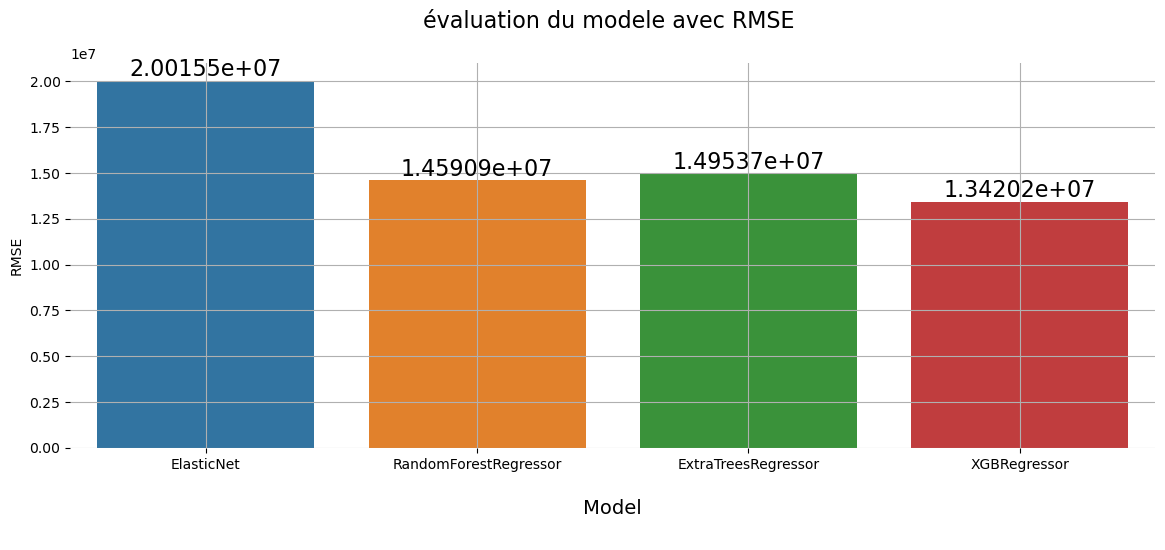

<IPython.core.display.Javascript object>

In [72]:
# RSMSE
plt.figure(figsize=(14, 5))
splot2 = sns.barplot(x="Algorithme", y="RMSE", data=df_resultsGrid)

plt.xlabel("\n Model \n", size=14)
plt.title("évaluation du modele avec RMSE \n", size=16)


# supprimer les bordures du graphe (côté esthétique)
for s in ["top", "bottom", "left", "right"]:
    splot2.spines[s].set_visible(False)

splot2.bar_label(
    splot2.containers[0], fontsize=16
)  # la valeur de l'ordonnée sur la bar

plt.grid()
plt.show()

# 9. Comparaison sans et avec gridsearch

In [76]:
df_results[1::]  # sans regression linéaire

,algorithme,MAE,RMSE,R2,temps (s)
1,ElasticNet,4.689607e+06,2.064122e+07,0.42390,0.043
2,RandomForestRegressor,2.861751e+06,1.364512e+07,0.74824,6.490
3,ExtraTreesRegressor,2.942841e+06,1.478225e+07,0.70453,8.064
4,XGBRegressor,2.865377e+06,1.381650e+07,0.74188,0.164


<IPython.core.display.Javascript object>

<Figure size 1200x800 with 0 Axes>

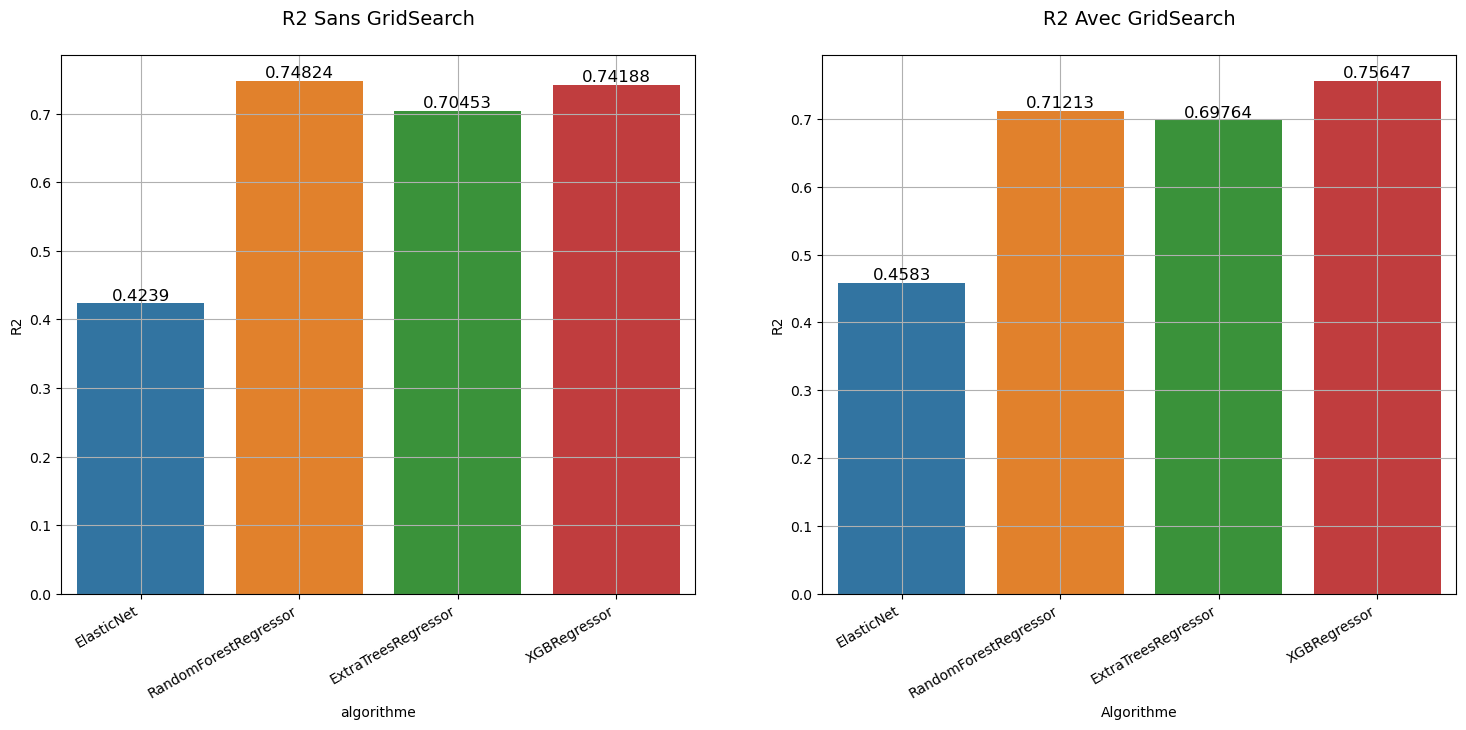

<IPython.core.display.Javascript object>

In [77]:
# R2
plt.figure(figsize=(12, 8))

fig, axs = plt.subplots(1, 2, figsize=(18, 7))

# sans GridSearcCV
Sans = sns.barplot(x="algorithme", y="R2", data=df_results[1::], ax=axs[0])
Sans.bar_label(Sans.containers[0], fontsize=12)

# Avec GridSearcCV
Avec = sns.barplot(x="Algorithme", y="R2", data=df_resultsGrid, ax=axs[1])
Avec.bar_label(Avec.containers[0], fontsize=12)

ax1 = axs[0]
ax2 = axs[1]

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha="right")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30, ha="right")


axs[0].grid()
axs[1].grid()

axs[0].set_title("R2 Sans GridSearch\n", fontsize=14)
axs[1].set_title("R2 Avec GridSearch\n", fontsize=14)

plt.show()

<Figure size 1200x800 with 0 Axes>

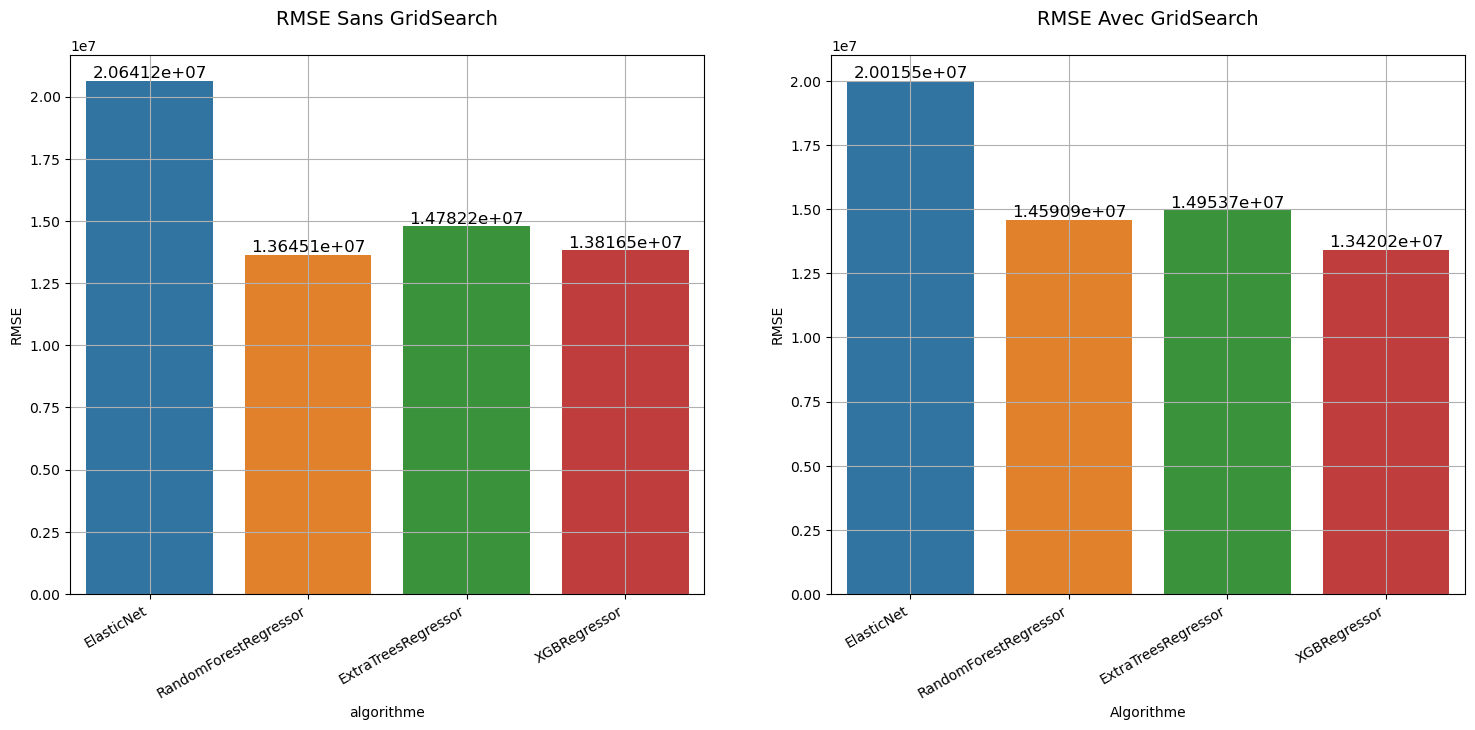

<IPython.core.display.Javascript object>

In [78]:
# RMSE
plt.figure(figsize=(12, 8))

fig, axs = plt.subplots(1, 2, figsize=(18, 7))

# sans GridSearcCV
Sans = sns.barplot(x="algorithme", y="RMSE", data=df_results[1::], ax=axs[0])
Sans.bar_label(Sans.containers[0], fontsize=12)

# Avec GridSearcCV
Avec = sns.barplot(x="Algorithme", y="RMSE", data=df_resultsGrid, ax=axs[1])
Avec.bar_label(Avec.containers[0], fontsize=12)

ax1 = axs[0]
ax2 = axs[1]

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha="right")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30, ha="right")


axs[0].grid()
axs[1].grid()

axs[0].set_title("RMSE Sans GridSearch\n", fontsize=14)
axs[1].set_title("RMSE Avec GridSearch\n", fontsize=14)

plt.show()

Le modèle le plus est *XGBRegressor()*

## 10 SHAP

Il serait intéressant de déterminer les colonnes les plus influentes pour notre modèle le plus performant *XGBRegressor()*, ainsi nous allons utiliser la librairie *shap* 

In [79]:
cat_transformer = TargetEncoder()
num_transformer = RobustScaler(
    with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0), copy=True
)


preprocessor = ColumnTransformer(
    transformers=[
        ("cat", cat_transformer, cols_categ),
        ("num", num_transformer, cols_num),
    ]
)


X_preprocessed = preprocessor.fit_transform(X, Y)


X_train, X_test, Y_train, Y_test = train_test_split(
    X_preprocessed, Y, test_size=0.2, random_state=42
)

rf = XGBRegressor()
rf.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<IPython.core.display.Javascript object>

In [80]:
X

,SourceEUI(kBtu/sf),YearBuilt,PropertyGFABuilding(s),PropertyGFAParking,BuildingType,ListOfAllPropertyUseTypes,PrimaryPropertyType,NumberofFloors,Neighborhood
0,182.500000,1927.0,88434.0,0.0,NonResidential,Hotel,Hotel,12.0,DOWNTOWN
1,176.100006,1996.0,88502.0,15064.0,NonResidential,"Hotel, Parking, Restaurant",Hotel,11.0,DOWNTOWN
2,241.899994,1969.0,759392.0,196718.0,NonResidential,Hotel,Hotel,41.0,DOWNTOWN
3,216.199997,1926.0,61320.0,0.0,NonResidential,Hotel,Hotel,10.0,DOWNTOWN
4,211.399994,1980.0,113580.0,62000.0,NonResidential,"Hotel, Parking, Swimming Pool",Hotel,18.0,DOWNTOWN
...,...,...,...,...,...,...,...,...,...
1663,161.699997,1990.0,12294.0,0.0,Nonresidential COS,Office,Office,1.0,GREATER DUWAMISH
1664,114.199997,2004.0,16000.0,0.0,Nonresidential COS,Other - Recreation,Other,1.0,DOWNTOWN
1665,744.799988,1974.0,13157.0,0.0,Nonresidential COS,"Fitness Center/Health Club/Gym, Other - Recrea...",Other,1.0,MAGNOLIA / QUEEN ANNE
1666,105.300003,1989.0,14101.0,0.0,Nonresidential COS,"Fitness Center/Health Club/Gym, Food Service, ...",Mixed Use Property,1.0,GREATER DUWAMISH


<IPython.core.display.Javascript object>

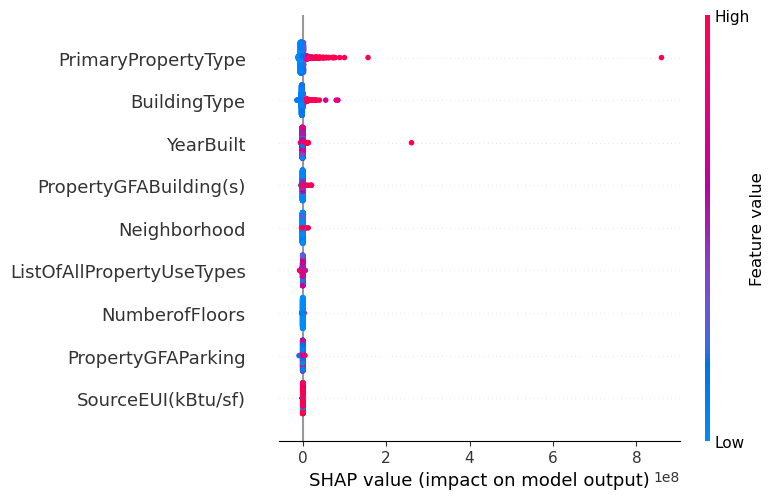

<Figure size 640x480 with 0 Axes>

<IPython.core.display.Javascript object>

In [81]:
explainer = shap.TreeExplainer(rf)


shap_values = explainer.shap_values(X_train)


# GRAPHIQUE
shap.summary_plot(shap_values, X_train, feature_names=X.columns.tolist())
plt.savefig("shape_values_emissions")

Les features les plus influents lors de notre prédiction sont  PrimaryPropertyType et BuildingType